In [14]:
pip install pyentrp

Note: you may need to restart the kernel to use updated packages.


In [2]:
import serial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz , argrelextrema , spectrogram , welch
import biosppy
import biosppy.signals.eda as eda
import neurokit2 as nk
import ledapy
from numpy.lib.stride_tricks import as_strided


In [3]:
# Global variables
Fs = 10

In [4]:
def Serial_configuration() :
    # Configure the serial port
    port = 'COM3'  # Replace with the appropriate COM port for your system
    baud_rate = 9600  # Set the baud rate to match your MC configuration
    data_bits = 8
    parity = serial.PARITY_NONE
    stop_bits = 1
    # Create a serial object
    global ser
    ser = serial.Serial(port, baud_rate, data_bits, parity, stop_bits)

In [5]:
def plot_discrete_data( my_signal , samples_num):
    F_sampling = samples_num  
    time = np.arange( 0 , F_sampling ) * (1/F_sampling) #Time  x-axis
    plt.stem(time , my_signal )  # Discrete


In [6]:
def save_data(a_df, data_list):
    data_to_append = []
    for data in data_list:
        new_panda_data = {
            "Data": data,
            "Data2": '1'
        }
        data_to_append.append(new_panda_data)

    # Concatenate the DataFrame with the new data
    a_df = pd.concat([a_df, pd.DataFrame(data_to_append)], ignore_index=True)
    # Save the DataFrame to an Excel file
    a_df.to_excel('serial_data.xlsx', index=False)

In [7]:
"""
The function take the signal and return the filtered signal
""" 
def apply_low_pass_filter_on_a_signal( order , normalized_cutoff , signal  ):
    fir_coefficients = firwin( order + 1, normalized_cutoff , window='hamming' ) # It return the FIR filter coefficients (bk)
    filtered_signal = np.convolve( signal , fir_coefficients, mode='same')  # 'same' to keep the output length the same
    return filtered_signal    

In [8]:
"""
Moving average filter
""" 
def Moving_avrage_filter( a_data_list , a_seconds , a_samplingFreq ):
    
    l_SCL = np.zeros(len(a_data_list)) # Save Tonic componanat
    l_SCR = np.zeros(len(a_data_list)) # Save phasic componant
    
    l_window = a_seconds * a_samplingFreq # Filter window
    
    for i in range( l_window , len(a_data_list) - l_window ):
        l_medium_filter_out = a_data_list[ i-l_window : i+l_window ]
        l_SCL[i] = np.median(l_medium_filter_out) # Make a medium filter
        l_SCR[i] = a_data_list[i] - l_SCL[i]
    return l_SCL , l_SCR


In [9]:
"""
Min_Max normalization
Perform Min-Max Normalization on a list of data.

Parameters:
- data (list): The input list of numerical values.

Returns:
- normalized_data (list): The list of normalized values.
"""
def min_max_normalization(a_data):

    l_min_val = min(a_data)
    l_max_val = max(a_data)

    l_normalized_data = [(l_x - l_min_val) / (l_max_val - l_min_val) for l_x in a_data]

    return l_normalized_data


In [10]:
def Processing_signal( a_signal ):
        processed_signal = apply_low_pass_filter_on_a_signal( 50 , 1/Fs , a_signal ) # Filtering signal
#         processed_signal = min_max_normalization(processed_signal)  # Normalization
#       processed_signal = eda.eda( a_signal , sampling_rate = Fs)
#       processed_signal = Moving_avrage_filter( a_signal , 4 )
#     onsets , peaks , amp = eda.kbk_scr( a_signal , Fs )
        return processed_signal

start

Data=147
Data=113
Data=100
Data=96
Data=101
Data=112
Data=150
Data=202
Data=217
Data=197
Data=152
Data=113
Data=101
Data=94
Data=99
Data=110
Data=147
Data=197
Data=214
Data=198
Data=155
Data=116
Data=104
Data=98
Data=99
Data=107
Data=136
Data=190
Data=216
Data=205
Data=166
Data=121
Data=105
Data=98
Data=99
Data=105
Data=128
Data=181
Data=215
Data=210
Data=170
Data=128
Data=107
Data=98
Data=98
Data=104
Data=124
Data=178
Data=211
Data=212
Data=175
Data=132
Data=108
Data=99
Data=95
Data=102
Data=119
Data=173
Data=212
Data=214
Data=178
Data=134
Data=109
Data=98
Data=97
Data=97
Data=122
Data=172
Data=210
Data=208
Data=177
Data=132
Data=106
Data=96
Data=97
Data=100
Data=123
Data=177
Data=211
Data=209
Data=167
Data=124
Data=104
Data=98
Data=98
Data=101
Data=130
Data=184
Data=215
Data=206
Data=160
Data=117
Data=104
Data=95
Data=96
Data=105
Data=140
Data=192
Data=215
Data=200
Data=154
Data=113
Data=100
Data=99
Data=99
Data=105
Data=155
Data=201
Data=215
Data=187
Data=142
Data=107
Data=98

Data=150
Data=148
Data=156
Data=171
Data=214
Data=252
Data=254
Data=224
Data=186
Data=161
Data=151
Data=148
Data=150
Data=165
Data=211
Data=249
Data=251
Data=223
Data=180
Data=154
Data=149
Data=147
Data=149
Data=166
Data=209
Data=245
Data=261
Data=226
Data=184
Data=160
Data=150
Data=149
Data=149
Data=156
Data=200
Data=243
Data=253
Data=233
Data=196
Data=159
Data=152
Data=146
Data=145
Data=155
Data=188
Data=235
Data=252
Data=235
Data=195
Data=159
Data=147
Data=144
Data=143
Data=152
Data=183
Data=232
Data=252
Data=240
Data=197
Data=157
Data=147
Data=144
Data=140
Data=149
Data=179
Data=229
Data=248
Data=241
Data=204
Data=156
Data=151
Data=142
Data=144
Data=149
Data=174
Data=223
Data=248
Data=243
Data=205
Data=165
Data=149
Data=142
Data=141
Data=146
Data=167
Data=212
Data=244
Data=245
Data=212
Data=172
Data=150
Data=143
Data=141
Data=142
Data=159
Data=203
Data=243
Data=246
Data=215
Data=170
Data=151
Data=141
Data=138
Data=143
Data=153
Data=192
Data=233
Data=246
Data=227
Data=187
Data=154
D

Data=248
Data=288
Data=302
Data=289
Data=248
Data=213
Data=200
Data=192
Data=192
Data=198
Data=218
Data=264
Data=296
Data=304
Data=278
Data=241
Data=209
Data=197
Data=193
Data=193
Data=205
Data=237
Data=281
Data=309
Data=300
Data=267
Data=218
Data=206
Data=199
Data=193
Data=199
Data=209
Data=256
Data=299
Data=308
Data=284
Data=243
Data=211
Data=195
Data=195
Data=196
Data=201
Data=231
Data=277
Data=303
Data=301
Data=261
Data=230
Data=204
Data=195
Data=192
Data=194
Data=205
Data=242
Data=285
Data=300
Data=290
Data=255
Data=217
Data=199
Data=191
Data=188
Data=191
Data=202
Data=242
Data=285
Data=305
Data=285
Data=247
Data=209
Data=197
Data=187
Data=187
Data=188
Data=204
Data=244
Data=286
Data=298
Data=278
Data=239
Data=204
Data=189
Data=185
Data=182
Data=188
Data=211
Data=256
Data=290
Data=295
Data=271
Data=231
Data=198
Data=192
Data=183
Data=185
Data=188
Data=216
Data=275
Data=308
Data=298
Data=259
Data=217
Data=190
Data=174
Data=167
Data=167
Data=178
Data=209
Data=261
Data=279
Data=259
D

Data=308
Data=14
Data=300
Data=10
Data=298
Data=11
Data=302
Data=12
Data=311
Data=20
Data=18
Data=306
Data=10
Data=301
Data=10
Data=301
Data=12
Data=300
Data=14
Data=310
Data=18
Data=309
Data=14
Data=300
Data=10
Data=302
Data=2
Data=300
Data=10
Data=305
Data=18
Data=306
Data=16
Data=299
Data=10
Data=298
Data=10
Data=301
Data=9
Data=307
Data=19
Data=307
Data=16
Data=301
Data=8
Data=301
Data=9
Data=301
Data=10
Data=303
Data=20
Data=19
Data=308
Data=14
Data=301
Data=11
Data=300
Data=12
Data=298
Data=8
Data=307
Data=20
Data=20
Data=18
Data=300
Data=9
Data=300
Data=10
Data=301
Data=10
Data=304
Data=16
Data=310
Data=16
Data=309
Data=12
Data=300
Data=9
Data=301
Data=13
Data=298
Data=17
Data=307
Data=23
Data=12
Data=300
Data=11
Data=300
Data=9
Data=301
Data=8
Data=306
Data=19
Data=311
Data=16
Data=300
Data=9
Data=299
Data=10
Data=300
Data=10
Data=304
Data=27
Data=21
Data=17
Data=308
Data=10
Data=297
Data=10
Data=299
Data=10
Data=302
Data=14
Data=308
Data=18
Data=306
Data=9
Data=300
Data=7
Data

Data=302
Data=10
Data=301
Data=10
Data=301
Data=11
Data=305
Data=14
Data=309
Data=18
Data=307
Data=10
Data=298
Data=9
Data=299
Data=9
Data=301
Data=10
Data=308
Data=21
Data=17
Data=303
Data=7
Data=301
Data=12
Data=303
Data=10
Data=304
Data=12
Data=309
Data=19
Data=308
Data=16
Data=300
Data=10
Data=298
Data=10
Data=302
Data=9
Data=304
Data=18
Data=311
Data=18
Data=306
Data=10
Data=300
Data=12
Data=301
Data=8
Data=302
Data=13
Data=307
Data=18
Data=310
Data=13
Data=301
Data=9
Data=301
Data=9
Data=300
Data=10
Data=307
Data=19
Data=307
Data=11
Data=301
Data=11
Data=305
Data=12
Data=302
Data=10
Data=301
Data=24
Data=16
Data=310
Data=17
Data=302
Data=11
Data=300
Data=9
Data=301
Data=10
Data=302
Data=20
Data=18
Data=310
Data=14
Data=302
Data=12
Data=301
Data=10
Data=298
Data=12
Data=302
Data=17
Data=311
Data=18
Data=305
Data=8
Data=302
Data=10
Data=301
Data=9
Data=300
Data=16
Data=309
Data=17
Data=311
Data=12
Data=300
Data=10
Data=301
Data=5
Data=300
Data=10
Data=309
Data=20
Data=17
Data=307
D

Data=304
Data=10
Data=303
Data=10
Data=306
Data=19
Data=310
Data=15
Data=301
Data=10
Data=300
Data=10
Data=302
Data=12
Data=308
Data=18
Data=307
Data=17
Data=302
Data=9
Data=298
Data=7
Data=302
Data=12
Data=306
Data=16
Data=310
Data=15
Data=302
Data=8
Data=301
Data=12
Data=302
Data=9
Data=308
Data=18
Data=312
Data=18
Data=298
Data=11
Data=301
Data=10
Data=301
Data=7
Data=305
Data=17
Data=311
Data=16
Data=305
Data=9
Data=300
Data=12
Data=296
Data=8
Data=304
Data=16
Data=314
Data=19
Data=306
Data=10
Data=301
Data=11
Data=302
Data=14
Data=301
Data=18
Data=310
Data=16
Data=307
Data=10
Data=300
Data=9
Data=299
Data=11
Data=302
Data=18
Data=310
Data=18
Data=306
Data=8
Data=301
Data=10
Data=301
Data=13
Data=299
Data=15
Data=309
Data=17
Data=305
Data=11
Data=301
Data=10
Data=301
Data=9
Data=303
Data=16
Data=308
Data=17
Data=306
Data=8
Data=303
Data=10
Data=300
Data=11
Data=302
Data=20
Data=19
Data=311
Data=17
Data=301
Data=8
Data=301
Data=14
Data=302
Data=10
Data=309
Data=18
Data=318
Data=16
D

Data=28
Data=45
Data=44
Data=46
Data=44
Data=26
Data=27
Data=26
Data=28
Data=29
Data=28
Data=40
Data=46
Data=45
Data=47
Data=32
Data=24
Data=26
Data=30
Data=26
Data=26
Data=29
Data=45
Data=47
Data=46
Data=39
Data=24
Data=28
Data=28
Data=30
Data=21
Data=29
Data=32
Data=45
Data=46
Data=45
Data=38
Data=28
Data=27
Data=28
Data=27
Data=26
Data=24
Data=36
Data=48
Data=45
Data=47
Data=35
Data=26
Data=28
Data=27
Data=25
Data=27
Data=28
Data=45
Data=49
Data=48
Data=44
Data=27
Data=27
Data=25
Data=25
Data=28
Data=29
Data=28
Data=46
Data=45
Data=44
Data=44
Data=24
Data=29
Data=30
Data=30
Data=29
Data=21
Data=32
Data=44
Data=44
Data=44
Data=39
Data=28
Data=25
Data=28
Data=28
Data=26
Data=26
Data=43
Data=47
Data=42
Data=46
Data=27
Data=28
Data=27
Data=27
Data=28
Data=29
Data=30
Data=43
Data=47
Data=46
Data=42
Data=26
Data=24
Data=26
Data=28
Data=28
Data=26
Data=36
Data=45
Data=43
Data=45
Data=40
Data=20
Data=25
Data=28
Data=26
Data=32
Data=28
Data=34
Data=46
Data=48
Data=44
Data=32
Data=26
Data=28


Data=48
Data=50
Data=50
Data=49
Data=77
Data=80
Data=78
Data=72
Data=51
Data=49
Data=48
Data=48
Data=47
Data=50
Data=67
Data=79
Data=81
Data=78
Data=60
Data=47
Data=50
Data=45
Data=51
Data=46
Data=50
Data=80
Data=80
Data=80
Data=72
Data=50
Data=52
Data=50
Data=50
Data=49
Data=49
Data=79
Data=80
Data=78
Data=70
Data=48
Data=51
Data=49
Data=49
Data=51
Data=47
Data=78
Data=81
Data=79
Data=64
Data=50
Data=48
Data=46
Data=51
Data=50
Data=57
Data=78
Data=79
Data=81
Data=60
Data=48
Data=49
Data=50
Data=48
Data=50
Data=59
Data=78
Data=80
Data=78
Data=62
Data=48
Data=51
Data=50
Data=48
Data=51
Data=54
Data=76
Data=85
Data=77
Data=65
Data=52
Data=47
Data=46
Data=57
Data=52
Data=51
Data=78
Data=81
Data=80
Data=64
Data=51
Data=51
Data=48
Data=48
Data=52
Data=49
Data=80
Data=87
Data=81
Data=76
Data=51
Data=52
Data=49
Data=48
Data=52
Data=49
Data=70
Data=83
Data=80
Data=75
Data=56
Data=55
Data=50
Data=52
Data=51
Data=50
Data=59
Data=82
Data=81
Data=78
Data=68
Data=50
Data=57
Data=48
Data=50
Data=49


Data=173
Data=136
Data=125
Data=126
Data=120
Data=124
Data=122
Data=133
Data=172
Data=184
Data=192
Data=175
Data=137
Data=127
Data=127
Data=128
Data=128
Data=122
Data=126
Data=181
Data=190
Data=188
Data=189
Data=143
Data=127
Data=128
Data=126
Data=128
Data=124
Data=126
Data=175
Data=188
Data=191
Data=188
Data=151
Data=127
Data=125
Data=127
Data=123
Data=127
Data=124
Data=165
Data=190
Data=188
Data=189
Data=162
Data=126
Data=126
Data=128
Data=123
Data=123
Data=126
Data=146
Data=186
Data=187
Data=188
Data=180
Data=125
Data=127
Data=127
Data=126
Data=128
Data=124
Data=133
Data=188
Data=191
Data=192
Data=185
Data=124
Data=126
Data=123
Data=128
Data=124
Data=130
Data=124
Data=182
Data=186
Data=190
Data=187
Data=143
Data=130
Data=128
Data=124
Data=125
Data=124
Data=124
Data=179
Data=187
Data=188
Data=189
Data=138
Data=121
Data=126
Data=129
Data=128
Data=123
Data=125
Data=176
Data=188
Data=189
Data=189
Data=145
Data=127
Data=124
Data=123
Data=123
Data=128
Data=126
Data=185
Data=190
Data=187
D

Data=119
Data=121
Data=136
Data=181
Data=190
Data=187
Data=176
Data=119
Data=123
Data=117
Data=122
Data=120
Data=120
Data=126
Data=182
Data=188
Data=191
Data=179
Data=122
Data=117
Data=119
Data=120
Data=117
Data=120
Data=118
Data=180
Data=185
Data=185
Data=179
Data=123
Data=121
Data=118
Data=118
Data=115
Data=115
Data=119
Data=177
Data=177
Data=186
Data=179
Data=126
Data=116
Data=119
Data=115
Data=118
Data=114
Data=118
Data=176
Data=183
Data=180
Data=175
Data=118
Data=115
Data=118
Data=113
Data=118
Data=116
Data=128
Data=181
Data=183
Data=187
Data=172
Data=116
Data=111
Data=116
Data=115
Data=117
Data=116
Data=139
Data=182
Data=180
Data=183
Data=156
Data=118
Data=114
Data=116
Data=116
Data=117
Data=120
Data=169
Data=184
Data=182
Data=179
Data=129
Data=118
Data=117
Data=115
Data=119
Data=120
Data=128
Data=182
Data=185
Data=181
Data=153
Data=114
Data=117
Data=112
Data=113
Data=115
Data=118
Data=165
Data=185
Data=178
Data=179
Data=118
Data=115
Data=118
Data=118
Data=113
Data=115
Data=156
D

Data=179
Data=176
Data=174
Data=139
Data=114
Data=115
Data=114
Data=111
Data=111
Data=119
Data=173
Data=177
Data=174
Data=157
Data=114
Data=115
Data=113
Data=110
Data=114
Data=113
Data=165
Data=179
Data=178
Data=171
Data=119
Data=110
Data=114
Data=112
Data=112
Data=112
Data=150
Data=174
Data=178
Data=176
Data=125
Data=114
Data=112
Data=114
Data=111
Data=113
Data=126
Data=174
Data=179
Data=177
Data=151
Data=115
Data=111
Data=112
Data=111
Data=114
Data=116
Data=173
Data=176
Data=178
Data=170
Data=112
Data=113
Data=112
Data=112
Data=114
Data=113
Data=152
Data=178
Data=177
Data=173
Data=129
Data=115
Data=114
Data=116
Data=111
Data=111
Data=125
Data=176
Data=180
Data=173
Data=150
Data=115
Data=107
Data=111
Data=115
Data=112
Data=115
Data=168
Data=175
Data=179
Data=175
Data=116
Data=112
Data=115
Data=110
Data=113
Data=112
Data=126
Data=176
Data=181
Data=175
Data=151
Data=112
Data=114
Data=111
Data=115
Data=114
Data=112
Data=171
Data=178
Data=178
Data=169
Data=112
Data=113
Data=115
Data=117
D

Data=91
Data=86
Data=89
Data=91
Data=86
Data=126
Data=140
Data=141
Data=134
Data=91
Data=89
Data=91
Data=90
Data=91
Data=87
Data=133
Data=142
Data=142
Data=126
Data=92
Data=90
Data=87
Data=93
Data=86
Data=89
Data=139
Data=136
Data=139
Data=108
Data=91
Data=91
Data=90
Data=92
Data=88
Data=114
Data=141
Data=142
Data=138
Data=92
Data=89
Data=90
Data=87
Data=90
Data=86
Data=133
Data=139
Data=139
Data=120
Data=88
Data=86
Data=90
Data=88
Data=89
Data=107
Data=142
Data=142
Data=136
Data=102
Data=88
Data=89
Data=87
Data=90
Data=92
Data=132
Data=140
Data=140
Data=131
Data=92
Data=91
Data=89
Data=85
Data=91
Data=87
Data=138
Data=140
Data=141
Data=125
Data=89
Data=87
Data=89
Data=86
Data=90
Data=96
Data=141
Data=142
Data=136
Data=101
Data=87
Data=89
Data=90
Data=88
Data=90
Data=124
Data=142
Data=138
Data=142
Data=87
Data=93
Data=90
Data=90
Data=91
Data=89
Data=131
Data=141
Data=141
Data=127
Data=88
Data=90
Data=93
Data=90
Data=88
Data=91
Data=139
Data=141
Data=138
Data=118
Data=89
Data=91
Data=88

Data=134
Data=129
Data=86
Data=89
Data=90
Data=90
Data=86
Data=87
Data=131
Data=139
Data=138
Data=131
Data=88
Data=86
Data=90
Data=88
Data=89
Data=88
Data=125
Data=137
Data=138
Data=137
Data=88
Data=83
Data=85
Data=88
Data=86
Data=88
Data=107
Data=134
Data=134
Data=133
Data=107
Data=85
Data=87
Data=86
Data=84
Data=92
Data=88
Data=134
Data=134
Data=137
Data=126
Data=84
Data=85
Data=89
Data=89
Data=89
Data=87
Data=130
Data=136
Data=137
Data=138
Data=91
Data=88
Data=86
Data=87
Data=87
Data=89
Data=100
Data=138
Data=138
Data=138
Data=114
Data=85
Data=85
Data=89
Data=81
Data=85
Data=94
Data=128
Data=136
Data=137
Data=136
Data=91
Data=89
Data=86
Data=85
Data=91
Data=89
Data=92
Data=137
Data=137
Data=136
Data=125
Data=87
Data=89
Data=88
Data=88
Data=87
Data=84
Data=118
Data=132
Data=137
Data=136
Data=111
Data=88
Data=86
Data=89
Data=85
Data=80
Data=86
Data=132
Data=135
Data=135
Data=130
Data=89
Data=88
Data=85
Data=88
Data=84
Data=89
Data=97
Data=132
Data=134
Data=136
Data=119
Data=90
Data=89

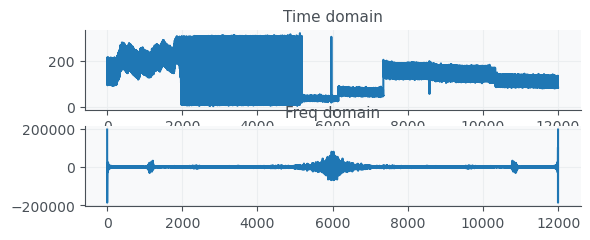

In [20]:
"""
  Read data from sensor 
""" 
def ReadDataFromSensor( a_time_sec ):
    
    # Create an empty DataFrame to store the received data
    panda_data = {
        "Data"  : [0],
        "Data2" : [0]
    }
    df = pd.DataFrame( panda_data )


    # Make the configuration
    Serial_configuration()
    counter = 0
    data_list = np.array([])
    counter = 0;


    print("start\n")
    # Read and store the serial data
    while True:
        if ser.in_waiting > 0:
            # Read Line
            temp =  ser.readline().decode().strip()
            counter = counter + 1

            if( temp == '' ):
                data = 0
            else :
                data = int( temp )

            if( counter >= a_time_sec*Fs ):
                ser.close()
                print('************************')
                data_list = np.append( arr = data_list , values = [data]  )

                # Plot signal
                plt.subplot(4,1,1)
                plt.title("Time domain")
                #plt.ylim(200 , 700)
                plt.plot( data_list )
                plt.subplot(4,1,2)
                plt.title("Freq domain")
                plt.plot(  np.real( ( np.fft.fft(data_list)[1:] ) ) )

#                 #Process signal
#                 process_data_list = Processing_signal( data_list )
#                 print('**********************************')
#                 plt.subplot(4,1,3)
#                 plt.title("After processing")
#                 plt.ylim(0.3 , 1)
#                 plt.plot( process_data_list , 'r')
#                 plt.subplot(4,1,4)
#                 plt.plot(  np.real( ( np.fft.fft(process_data_list)[1:] )  ) , 'r' )

                # Empty the list and counter
                counter = 0
                break
            else :
                data_list = np.append( arr = data_list , values = [data]  )
                print("Data={:d}".format(data))

    # Save the data 
    save_data( df , data_list )
    return data_list 
        
GSR_Read_data = ReadDataFromSensor(60*20)


In [22]:
# Close serial connection
ser.close()

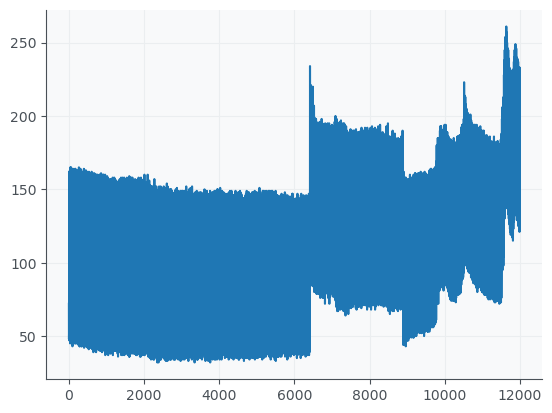

In [14]:
kkkk = GSR_Read_data
# kkkk = apply_low_pass_filter_on_a_signal( 10 , 1.5/Fs , kkkk ) # Filtering signal
plt.plot(kkkk[3:-3])

In [13]:
"""
                Not good to Extract onset and offset, so we didn't use it
                
  Make preprocessing       : Applaying FIR Low pass filter of order 50 at cutoff 1.5/Fs
                             Make Min_Max Normalization to the signal
  Extract Phasic and tonic : Using cvxEDA method from neurokit2 package                     
"""
def GSR_preprocessingAndExtractPhasicAndTonic( a_signal , a_plot=True ):
    
    a_signal = min_max_normalization(a_signal) #First make normalization to the signal
    a_signal = apply_low_pass_filter_on_a_signal( 50 , 1.5/Fs , a_signal ) # Make a Low pass filter



    l_eda_tonic_phasic = nk.eda_phasic( a_signal , sampling_rate=Fs , method="cvxEDA"  )


    l_eda_phasic = l_eda_tonic_phasic['EDA_Phasic'].tolist()
    l_eda_tonic = l_eda_tonic_phasic['EDA_Tonic'].tolist()
    
    
    if( a_plot == True ):
        plt.subplot(3,1,1)
        plt.plot(a_signal, 'b')
        plt.subplot(3,1,1)
        plt.plot( l_eda_tonic , 'r' )
        plt.subplot(3,1,3)
        plt.plot( l_eda_phasic )
        plt.subplot(3,1,3)
        plt.plot( [0.01]*len(a_signal) )
        
    return l_eda_tonic , l_eda_phasic   


Fs = 10
x = Get_dataFromTextFile('serial_data_1.txt')    
llvll,ggg = GSR_preprocessingAndExtractPhasicAndTonic(x,True)


NameError: name 'Get_dataFromTextFile' is not defined

In [ ]:
"""
                      GSR_ExtractPhasicTonic_OnsetAndOffset
                      
  Make preprocessing       : Applaying FIR Low pass filter of order 50 at cutoff 1/Fs
                             Make Min_Max Normalization to the signal
 Extract Phasic and tonic  : Using neurokit method
 Extract onset and offset  : from pahsic componat of signal using threshold 0.01 of onset
                             and 0 of offset
 Extract peaks             : from cleaned data, it will extract peaks between each couple onset and offset                           
 return                    : It returns phasic, tonic, onset_offset couple and peaks
                            
"""
def GSR_ExtractPhasicTonic_OnsetAndOffset_Peaks( a_gsr_sig , a_plot=True ):
    
    l_sig =  apply_low_pass_filter_on_a_signal( 50 , 1/Fs , a_gsr_sig ) # Make a Low pass filter
    l_sig = min_max_normalization(l_sig) # Make Normalization

    # --- Get phasic and tonic componants ---
    l_process_sig , l_process_info = nk.eda_process(  l_sig , sampling_rate=Fs , method='neurokit' )
    l_tonic  = l_process_sig['EDA_Tonic'].tolist()   # Get tonic  componant and change it to a list
    l_phasic = l_process_sig['EDA_Phasic'].tolist()  # Get phasic componant and change it to a list
    
    # cvxEDA method gives a phasic compnant from 0 to 1, no offset in it, so we didn't use it
#     l_eda_tonic_phasic = nk.eda_phasic( l_sig , sampling_rate=Fs , method="cvxEDA"  )
#     l_phasic = l_eda_tonic_phasic['EDA_Phasic'].tolist()
#     l_tonic = l_eda_tonic_phasic['EDA_Tonic'].tolist()
    
    l_phasic = l_phasic[0:] # Slice phasic componant
    l_sig = l_sig[0:]

    # --- Calculate onsets and offsets ---
    l_onset_threshold = 0.01
    l_offset_threshold=0

    # Initialize onset and offset array
    l_onset  = np.zeros( len(l_phasic) )
    l_offset = np.zeros( len(l_phasic) )

    # Onset
    for i in range( len(l_phasic) ): # Get all points that is larger than onset threshold 
        if( l_phasic[i] > l_onset_threshold ):
            l_onset[i] = i
        else:
            l_onset[i] = 0

    # Offset
    for i in range( len(l_phasic) ): # Get all points that is smaller than offset threshold 
        if( l_phasic[i] <= l_offset_threshold ):
            l_offset[i] = i
        else:
            l_offset[i] = 0

    # The next step is to couple onset and offset with each other
    l_index = 0
    l_token = 1
    l_len = max( len(l_offset) , len(l_onset) )


    l_onset_offset_couple = []  # An array that will save the onset and offset couples

    for i in range( l_len-1 ):
        if( l_token == 1 ): 
            while( l_index < len(l_onset) and l_onset[l_index] == 0 ):
                l_index = l_index + 1
    
            # A start of an onset
            l_onset_index = l_index 
            l_token = 0

        if( l_token == 0 ):
            while( l_index < len(l_offset) and l_offset[l_index] == 0 ):
                l_index = l_index + 1
  
            # couple offset with it's onset
            l_offset_index = l_index
            l_token = 1
            # Cheack if it reaches end of list
            if( l_index >= l_len-1 ):
                break  
            else :
                 l_onset_offset_couple.append( [l_onset_index,l_offset_index] ) # append couple
    
    
   
            
    # Separate onset and offset points from each other to draw them
    l_draw_onset = []
    for i in range( len(l_onset_offset_couple) ):
        l_draw_onset.append( l_onset_offset_couple[i][0] )
        
    l_draw_offset = []
    for i in range( len(l_onset_offset_couple) ):
        l_draw_offset.append( l_onset_offset_couple[i][1] )    

    # X_axis of the onset and offsets    
    l_onset_x_axis  = [l_onset_threshold]*len(l_draw_offset) 
    l_offset_x_axis = [l_offset_threshold]*len(l_draw_offset)
        

    # --- Find peaks between each onset and offset ---
    l_interval = [] # Will contain values of samples between onset and offset
    l_peaks = [] # Will contains the peaks for each onset-offset pair
    for i in range( len(l_onset_offset_couple ) ):
        l_j=0
        l_temp = l_onset_offset_couple[i][0] # Get the index of onset point

        while( l_temp < l_onset_offset_couple[i][1] ): # Loop untill reaches the corresponding offset value
            l_interval.append( l_sig[ l_temp ] ) # append the raw signal value which is between onset and offset
            l_temp+=1
        # At this point we reaches the end of onset-offset interval
        l_max_value = max(l_interval) # peak value
        l_peaks.append( [  l_temp-len(l_interval)+l_interval.index(l_max_value) , l_max_value ] ) # append the peaks index and peak value
        l_interval.clear() # Clear the interval list
        
    # Separate index of peak points from peak value in two arrays
    l_draw_peak_index = []
    l_draw_peak_value = []
    for i in range( len(l_peaks) ):
        l_draw_peak_index.append( l_peaks[i][0] ) 
        l_draw_peak_value.append( l_peaks[i][1] ) 
        
    # Draw a histogram
    l_timeForEachSample = 100
    l_draw_histogram = np.zeros( int( len(l_phasic)/(Fs*l_timeForEachSample) ) + 1 )
    for i in range( len(l_draw_peak_index) ):
        l_his_index = int( l_draw_peak_index[i]/(Fs*l_timeForEachSample) ) # Get interval of each sample
        l_draw_histogram[ l_his_index ] += 1 # increment 
        
    # Plot
    if( a_plot == True ):
        plt.subplot(3,1,1)
        plt.title('phasic')
        plt.plot(l_phasic )
        plt.scatter( l_draw_onset , l_onset_x_axis , c='r' , label='onset'   )   # Draw onsets
        plt.scatter( l_draw_offset , l_offset_x_axis , c='g' , label='offset'   ) # Draw offsets
        plt.grid()
        plt.subplot(3,1,2)
        plt.title('Raw data')
        plt.plot(l_sig , label='cleaned signal')
        plt.scatter( l_draw_peak_index , l_draw_peak_value ,c='#FF5733' , marker='x' ) 
        plt.grid()
        plt.subplot(3,1,3 )
        plt.bar( np.arange(0,len(l_draw_histogram) ) , l_draw_histogram)
        plt.grid()

        
    return l_phasic , l_draw_histogram , l_tonic , l_onset_offset_couple , l_peaks     
    
    
    
Fs = 10    
x = Get_dataFromTextFile('serial_data_1.txt')    
x= kkkk

f , g , _ , _ , _ = GSR_ExtractPhasicTonic_OnsetAndOffset_Peaks(x)    
g

In [15]:
"""
   This function takes the phasic, onset and peaks and plot them
"""
def Plot_Phasic_with_onset_and_peaks( a_phasic , a_onset , a_peak ):
    l_ts = np.linspace(0, (len(a_phasic)-1)/16,len(a_phasic),endpoint=False)
    plt.plot(l_ts,a_phasic , label='Signal 1')
    plt.scatter(l_ts[a_peak],a_phasic[a_peak],c='r',s=10 , label='Signal 1')
    plt.scatter(l_ts[a_onset],a_phasic[a_onset],c='y',s=10 , label='Signal 1')

def Plot_orign_with_onset_and_peaks( a_orign , a_tonic , a_onset , a_peak ):
    l_ts = np.linspace(0, (len(a_orign)-1)/16,len(a_orign),endpoint=False)
    plt.plot(l_ts,a_orign,c='b')
    plt.plot(l_ts,a_tonic,c='g')
    plt.scatter(l_ts[a_peak] ,a_orign[a_peak],c='r',s=20)
    plt.scatter(l_ts[a_onset] , a_orign[a_onset],c='y',s=10)
    

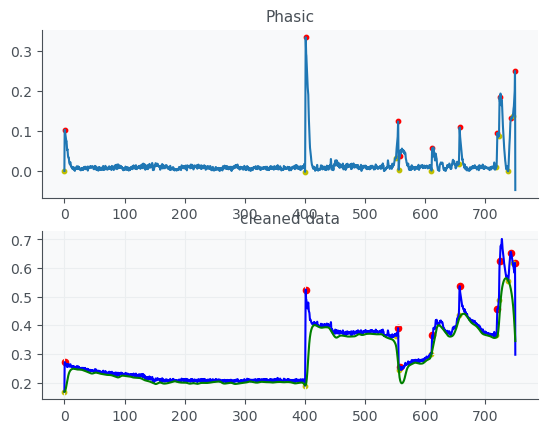

[   11  6422  8880  8922  9785 10518 11522 11582 11887 11990]
[    0  6403  8820  8897  9767 10492 11495 11562 11809 11930]


array([   11,  6422,  8880,  8922,  9785, 10518, 11522, 11582, 11887,
       11990], dtype=int64)

In [16]:
"""
   This function is used to plot data from Ledapy_GSR_ExtractPhasicTonic_Onset_Peaks functio
"""

def Ledapy_plot( a_orign , a_phasic , a_tonic , a_onset , a_peak):
    plt.subplot(2,1,1)
    plt.grid()
    plt.title('Phasic')
    Plot_Phasic_with_onset_and_peaks( a_phasic , a_onset , a_peak )
    
    plt.subplot(2,1,2)
    plt.grid()
    plt.title('cleaned data')
    Plot_orign_with_onset_and_peaks(  a_orign , a_tonic , a_onset , a_peak )
    plt.grid()
    plt.show()
    plt.close()
    
    
"""
                      Ledapy_GSR_ExtractPhasicTonic_Onset_Peaks_risetime
                      
  Make preprocessing       : Applaying FIR Low pass filter of order 50 at cutoff 1.5/Fs
                             Make Min_Max Normalization to the signal
 Extract Phasic and tonic  : Using ledapy method
 Extract onset and offset  : from pahsic componat of signal using threshold 0.1 
 
 Extract peaks             : from cleaned data, it will extract peaks                      
 return                    : It returns cleaned signal , phasic , tonic , onsets , peaks, raise_time
                            
"""
def Ledapy_GSR_ExtractPhasicTonic_Onset_Peaks_risetime( a_signal , a_min_amplitude , a_plot=True ):                
    l_scrs, l_amps, l_ZC, l_pks = [], [], [], []
    a_signal = min_max_normalization(a_signal) #First make normalization to the signal
    a_signal = apply_low_pass_filter_on_a_signal( 50 , 1/Fs , a_signal ) # Make a Low pass filter
    
    l_phasicData  = ledapy.runner.getResult( a_signal ,  'phasicdata' , sampling_rate =Fs , downsample=1 )
    l_pahsicDriver = ledapy.runner.getResult( a_signal , 'phasicdriver' , sampling_rate =Fs , downsample=1 )
    l_tonicData = a_signal - l_phasicData


    # Find zero crossings
    l_zeros = argrelextrema(l_phasicData,np.less)[0]

    l_zeros = np.insert(l_zeros,0,0) # Insert zereo at index zero
    l_zeros = np.insert(l_zeros,len(l_zeros) , len(l_phasicData)-1) # insert the last index in the array at end


    for i in range(0, len(l_zeros) - 1, 1):
        l_scrs += [ l_phasicData[l_zeros[i]:l_zeros[i + 1]+1] ]
        l_aux = l_scrs[-1].max()
        if l_aux > l_phasicData[l_zeros[i]] and l_aux > l_phasicData[l_zeros[i+1]]:
            l_amps += [l_aux-l_phasicData[l_zeros[i]]]
            l_ZC += [l_zeros[i]]
            l_ZC += [l_zeros[i + 1]]
            l_pks += [l_zeros[i] + np.argmax(l_phasicData[l_zeros[i]:l_zeros[i + 1]])]
        elif l_aux == l_phasicData[l_zeros[-1]]:
            l_amps += [l_aux-l_phasicData[l_zeros[-2]]]
            l_ZC += [l_zeros[-2]]
            l_ZC += [l_zeros[-1]]
            l_pks += [l_zeros[-1]]
    if l_amps == []:
        l_ZC += [np.argmin(l_phasicData)]
        l_amps += [np.max(l_phasicData[l_ZC[0]:])-l_phasicData[l_ZC[0]]]
        l_pks += [np.argmax(l_phasicData[l_ZC[0]:])]

    # Find the maximum length of arrays in the list
    l_max_length = max(len(l_scrs) for l_scrs in l_scrs)

    # Pad shorter arrays with zeros to make them the same length
    l_padded_scrs = [np.pad(l_scrs, (0, l_max_length - len(l_scrs)), 'constant') for l_scrs in l_scrs ]

    l_scrs = np.array(l_padded_scrs)
    l_amps = np.array(l_amps)
    l_ZC = np.array(l_ZC)
    l_pks = np.array(l_pks)
    l_onsets = l_ZC[::2]
    l_thr = a_min_amplitude * np.max(l_amps)
    l_arglow = np.where(l_amps<l_thr)
    l_amps = np.delete(l_amps,l_arglow)
    l_pks = np.delete(l_pks,l_arglow)
    l_onsets = np.delete(l_onsets,l_arglow)

    l_risingtimes = l_pks-l_onsets
    l_risingtimes = l_risingtimes/16

    l_pks = l_pks[l_risingtimes > 0.1]
    l_onsets = l_onsets[l_risingtimes > 0.1]
    l_amps = l_amps[l_risingtimes > 0.1]
    
    # Plot
    if( a_plot == True ):
        Ledapy_plot( a_signal , l_phasicData, l_tonicData , l_onsets , l_pks )

        
        
    l_rise_time = l_pks - l_onsets
    return  a_signal , l_phasicData , l_tonicData , l_onsets , l_pks , l_rise_time


Fs = 10    
# x = Get_dataFromTextFile('serial_data_1.txt')    
x = kkkk
clean_sig , ph , ton , onsets , ppk , raise_time = Ledapy_GSR_ExtractPhasicTonic_Onset_Peaks_risetime(  np.array(x) , 0.1 )

print(ppk)
print(onsets)
ppk

C:\Users\mohammedhamdy32\anaconda3\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


1

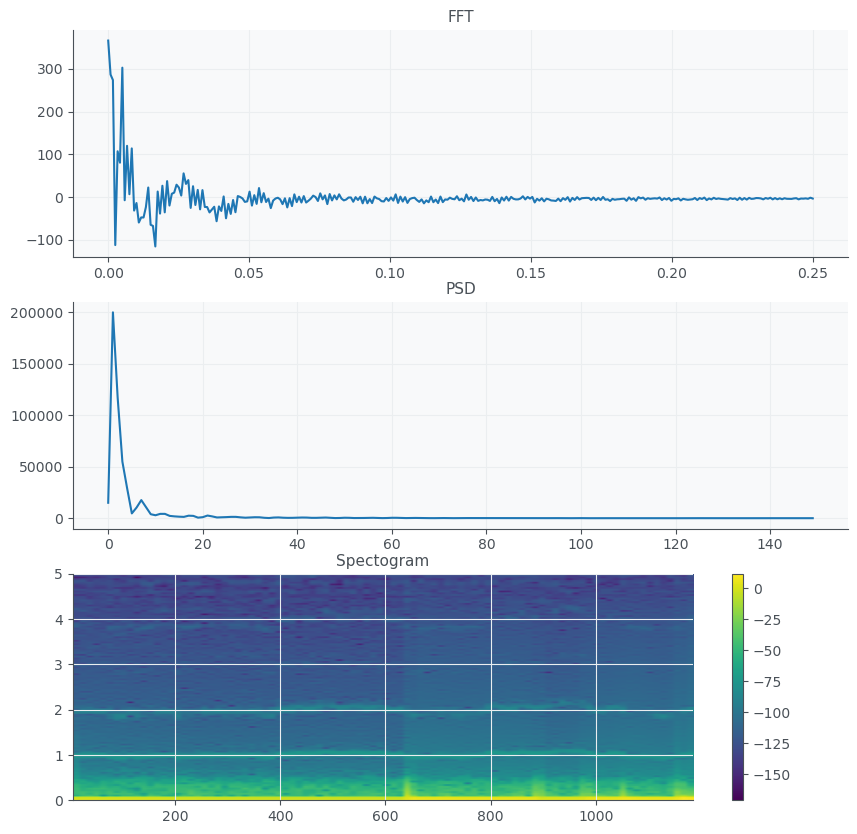

In [17]:
"""
     Extract_frequency_Features
     
     This function Extracts some Freqency features from signal like FFT, PSD and Spectogram
     Return : FFT , PSD and Spectogram_Sxx

"""
def Extract_frequency_Features( a_signal , a_plot=True ):
    
    l_sig = a_signal
    l_sig =  apply_low_pass_filter_on_a_signal( 50 , 0.4/Fs , a_signal ) # Make a Low pass filter
    l_sig = min_max_normalization(l_sig) # Make Normalization
#     l_sig = l_sig[30:-60]

    # Compute Fast Forrirer Transform
    l_fft_sig = np.fft.fft( l_sig )[1:]
    # Compute power specturn denisty of signal
    l_freq, l_psd = welch( a_signal , fs=Fs , nperseg=len(a_signal) )
    # Compute spectrogram
    l_spectogram_freq , l_spectogram_times , l_spectogram_Sxx = spectrogram( np.array(a_signal) , fs=Fs  )
    
    
    # Get freqency from 0 to 0.25HZ, because the signal power is concentrated in this range
    l_fft_sig = l_fft_sig[0 : int(np.round( (0.25/Fs)*(len(l_fft_sig)) )) ]
    l_psd     = l_psd    [0 : int(np.round( (0.25/Fs)*(len(l_psd))     )) ]
    
        
    if( a_plot == True ):
        # Plot FFT signal
        plt.figure(figsize=(10, 10))
        plt.subplot(3,1,1)
        plt.title('FFT')
        l_FFT_x_axis = np.linspace( 0 , 0.25 , len(l_fft_sig)  ) # Get x_axis of FFT graph from 0 to 0.4HZ 
        plt.plot( l_FFT_x_axis , l_fft_sig )

        # Plot PSD signal
        plt.subplot(3,1,2)
        plt.title('PSD')
        plt.plot( l_psd )

        # Plot spectogram
        plt.subplot(3,1,3)
        plt.title('Spectogram')
        plt.specgram( l_sig , Fs=Fs )
        plt.colorbar()
    
    
    return l_fft_sig , l_psd , l_spectogram_Sxx


Fs = 10    
# x = Get_dataFromTextFile('serial_data_1.txt')   
x = kkkk
Extract_frequency_Features(x) 
1

In [ ]:
"""        
   This function takes the signal and split it into many windows to make process on each window
   a_arr     : is the my array
   a_window  : is the window size
   a_overlap : The overlab between ach window
   
   The function returns a two dimention array contains all windows
   Number of windows equal len(a_arr)/(window-overlab)
   Size of eah window equal a_window
   
   Taken from https://github.com/DebasmitaGhose/Stress-Modeling-with-GSR-and-Speech-Sensors/blob/master/GSR.py
"""
def windowed_view( a_arr, a_window_size , a_overlap):
    a_arr = np.asarray(a_arr)
    l_window_step = a_window_size - a_overlap
    l_new_shape = a_arr.shape[:-1] + ((a_arr.shape[-1] - a_overlap) // l_window_step, a_window_size)
    l_new_strides = (a_arr.strides[:-1] + (l_window_step * a_arr.strides[-1],) + a_arr.strides[-1:])
    
    return as_strided( a_arr, shape=l_new_shape, strides=l_new_strides)

In [58]:
"""
   Extract_MeanMaxMinSlopPeakNumPeakMeanPeak25Peak50Peak75
   
   This function takes signal, window size and overlab and make windowing on it
   
   It Extracts some features from GSR signal which are Mean, max, min
   slop, peak number, peak mean, peak 25% percentile, peak 50% percentile and
   peak 75% percentile then returns them 
   
"""

def WindowGSR_Data_And_Extract_MeanMaxMinSlopPeakNumPeakMeanPeak25Peak50Peak75( a_x , a_window_size , a_overlap ):
    
    # Change list to an array
    a_x = np.asarray(a_x)
    a_y = np.linspace(0, len(a_x)-1 , len(a_x) )
 
    
    # Get peaks of signal
    l_clean_sig , _, _, _,l_peak, _ = Ledapy_GSR_ExtractPhasicTonic_Onset_Peaks_risetime(  np.array(a_x) , 0.1 , False ) 

    
    # Make windowing
    a_x = windowed_view( a_x , a_window_size , a_overlap )
    a_y = windowed_view( a_y , a_window_size , a_overlap )

    l_mean  = np.mean( a_x , axis=-1 )   # Get mean of data
    l_max   = np.max ( a_x , axis=-1 )   # Get max  of data
    l_min   = np.min ( a_x , axis=-1 )   # Get min  of data
    
#     l_slope  = np.polyfit( a_x , a_y, 1)
    l_slope = ((a_x*a_y).mean(axis=-1) - a_x.mean()*a_y.mean(axis=-1)) / ((a_x**2).mean() - (a_y.mean())**2) # Linear regression slop
    
    l_peaks_numb = []
    l_peaks_mean = []
    l_peaks_25 = []
    l_peaks_50 = []
    l_peaks_75 = []
    
    for i in range( 0 , a_x.shape[0] ): # Loop number of windows times
        l_window_peaks = []  # Empty the list
        for j in range( 0 , len(l_peak) ): # loop on peaks list to know peaks in this window
            if( l_peak[j] in a_y[i] ):
                l_window_peaks.append(l_peak[j])
   
        # After getting all the peaks for this window, we will calculate it's number, mean, Percentile
        if( len(l_window_peaks) > 0 ): # Check if there is a peak
            l_peaks_numb.append( len(l_window_peaks) )
            print( np.mean( l_clean_sig[l_window_peaks] ) )
            l_peaks_mean.append( np.mean( l_clean_sig[l_window_peaks] ) )# Mean of peaks ampitude 
            l_peaks_25.append( np.percentile(l_window_peaks , 25 ) )  # At which value 25% of dataset fall
            l_peaks_50.append( np.percentile(l_window_peaks , 50 ) )  # At which value 50% of dataset fall
            l_peaks_75.append( np.percentile(l_window_peaks , 75 ) )  # At which value 75% of dataset fall 
        else:   # No peaks in this window
            l_peaks_numb.append(0)
            l_peaks_mean.append (0)
            l_peaks_25.append(0)
            l_peaks_50.append(0)
            l_peaks_75.append(0)

    
    return l_mean , l_max , l_min , l_slope , l_peaks_numb , l_peaks_mean , l_peaks_25 , l_peaks_50 , l_peaks_75


In [112]:
Fs = 10
x = Get_dataFromTextFile('serial_data_1.txt')        

a , b, c , d , e, f , k , l , p = WindowGSR_Data_And_Extract_MeanMaxMinSlopPeakNumPeakMeanPeak25Peak50Peak75( x  , 1000 , 0 )
a.shape

0.4698660876633213
0.47566489085163194
0.6996597453788881
0.5475943885737743
0.33102475069050813
0.28277071722704306


(10,)

In [50]:
"""
   Read a file
"""

def Get_dataFromTextFile( a_file_name ):
    # Open the file
    l_file_path = a_file_name  # Provide the path to your text file
    l_x = []

    with open(l_file_path, 'r') as file:
        # Read each line in the file
        for line in file:
            # Remove leading/trailing whitespaces and split if there are commas
            line_data = line.strip().split(',')

            # Convert each non-empty item in the line to a float and add to the data list
            for item in line_data:
                if item.strip():  # Check if the item is not an empty string
                    l_x.append(float(item))
    return l_x    

In [181]:
"""
  Get data from an Excel file
"""

def Get_dataFromExcel(a_file_path, a_column_name=None):
    try:
        # Read the Excel file
        l_df = pd.read_csv(a_file_path)
        
        # Extract the specified column
        if( a_column_name == None):
            l_column_temp = l_df.values.tolist()
            l_column_data = [item for sublist in l_column_temp for item in sublist]

        else:    
            l_column_data = l_df[a_column_name].tolist()
        
        return l_column_data
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

file_path = '../../../datasets/Mental_workLoad/MAUS/MAUS/Data/Raw_data/002/inf_gsr.csv' 
column_name = 'Trial 1:0back'  
column_data = Get_dataFromExcel(file_path, column_name)


In [19]:
"""
Write a list in a text file
"""
def Write_listInFile( a_file_name , a_list ):
    # Specify the file path where you want to save the data
    file_path = a_file_name
    # Open the file in write mode and write each number in the list to a separate line
    with open(file_path, 'w') as file:
        for number in a_list:
            file.write(str(number) + '\n')

# Write_listInFile( 'MentalWorkLoad/watching_an_AI_lecture.txt' , kkkk )

# Display some datasets

Mental work Load datasets

In [ ]:


# Sampling freqency for this dataset is 100HZ for pixArt and 256HZ for inf

###############################################################################################################
###############################################################################################################
############################################  002 #############################################################
###############################################################################################################
###############################################################################################################


Fs = 256
print('**************************************************************************')
print('***************************** MWL 002 ************************************')
print('**************************************************************************')
####################################### During resting 5min ###################################################
Resting2 = Get_dataFromExcel( '../../../datasets/Mental_workLoad/MAUS/MAUS/Data/Raw_data/002/inf_resting.csv','Resting_GSR')
# Clean and Extract some time domain features
r_clean_sig2 , r_Phasic2 , r_tonic2 , r_onset2 , r_peaks2 , _ = Ledapy_GSR_ExtractPhasicTonic_Onset_Peaks_risetime( Resting2 , 0.1 , a_plot=False )

plt.figure(figsize=(10, 10))
# Plot cleaned data
plt.subplot( 3 , 2 , 1  )
plt.title('Resting cleaned GSR ')
plt.plot(r_clean_sig2)
# Plot Phasic componants with onsets and peaks
plt.subplot( 3 , 2 , 3 )
plt.title('Resting Phasic')
Plot_Phasic_with_onset_and_peaks( r_Phasic2 , r_onset2 , r_peaks2 )
# plot freqency componants
r_FFT2 , r_PSD2 , _ = Extract_frequency_Features( r_clean_sig2 , a_plot=False )
plt.subplot( 3 , 2 , 5 )
plt.title('Resting PSD')
plt.plot(r_PSD2)
print( f"PSD at resting = {sum(r_PSD2)}")



####################################### During Mental work load Trial1 ###################################################
MWL2  = Get_dataFromExcel( '../../../datasets/Mental_workLoad/MAUS/MAUS/Data/Raw_data/002/inf_gsr.csv', 'Trial 1:0back')
m_clean_sig2 , m_Phasic2 , m_tonic2 , m_onset2 , m_peaks2 , _ = Ledapy_GSR_ExtractPhasicTonic_Onset_Peaks_risetime( MWL2 , 0.1 , a_plot=False )

# Plot cleaned data
plt.subplot( 3 , 2 , 2  )
plt.title('MWL GSR Raw data')
plt.plot(m_clean_sig2)
# Plot Phasic componants with onsets and peaks
plt.subplot( 3 , 2 , 4 )
plt.title('MWL Phasic')
Plot_Phasic_with_onset_and_peaks( m_Phasic2 , m_onset2 , m_peaks2 )
# plot freqency componants
m_FFT2 , m_PSD2 , _ = Extract_frequency_Features( m_clean_sig2 , a_plot=False )
plt.subplot( 3 , 2 , 6 )
plt.title('MWL PSD')
plt.plot(m_PSD2)
print( f"PSD at MWL = {sum(m_PSD2)}")



PSD at resting = 18.613046793806483
PSD at MWL = 5.877852757530461


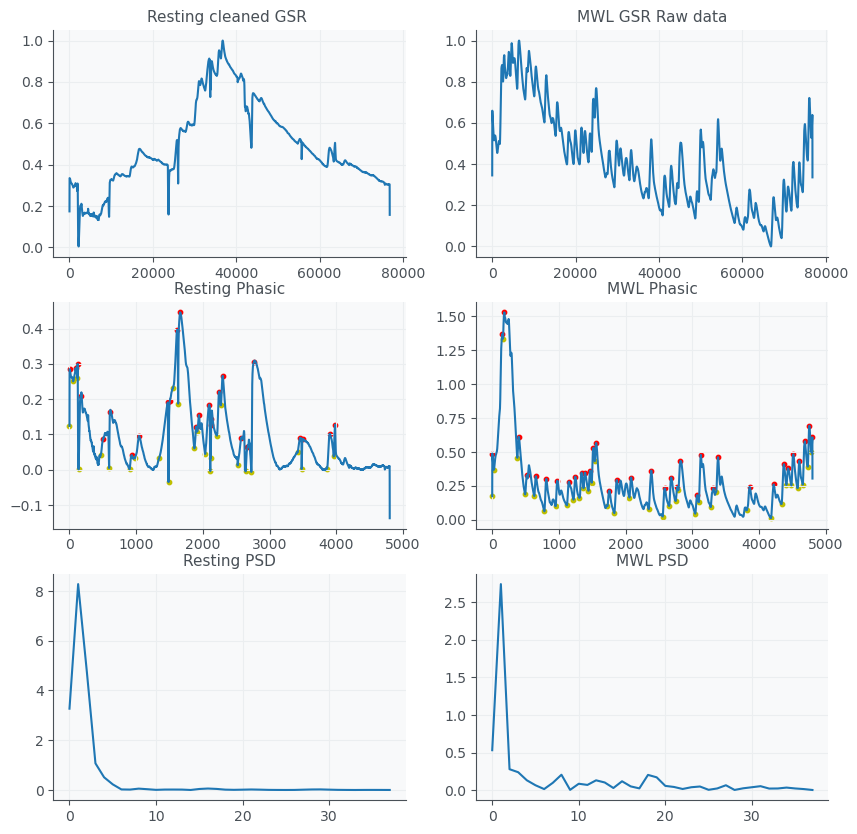

In [157]:
# Sampling freqency for this dataset is 100HZ for pixArt and 256HZ for inf

###############################################################################################################
###############################################################################################################
############################################  004 #############################################################
###############################################################################################################
###############################################################################################################

Fs = 256
print('**************************************************************************')
print('***************************** MWL 004 ************************************')
print('**************************************************************************')
####################################### During resting 5min ###################################################
Resting4 = Get_dataFromExcel( '../../../datasets/Mental_workLoad/MAUS/MAUS/Data/Raw_data/004/inf_resting.csv','Resting_GSR')
# Clean and Extract some time domain features
r_clean_sig4 , r_Phasic4 , r_tonic4 , r_onset4 , r_peaks4 , _ = Ledapy_GSR_ExtractPhasicTonic_Onset_Peaks_risetime( Resting4 , 0.1 , a_plot=False )

plt.figure(figsize=(10, 10))
# Plot cleaned data
plt.subplot( 3 , 2 , 1  )
plt.title('Resting cleaned GSR ')
plt.plot(r_clean_sig4)
# Plot Phasic componants with onsets and peaks
plt.subplot( 3 , 2 , 3 )
plt.title('Resting Phasic')
Plot_Phasic_with_onset_and_peaks( r_Phasic4 , r_onset4 , r_peaks4 )
# plot freqency componants
r_FFT4 , r_PSD4 , _ = Extract_frequency_Features( r_clean_sig4 , a_plot=False )
plt.subplot( 3 , 2 , 5 )
plt.title('Resting PSD')
plt.plot(r_PSD4)
print( f"PSD at resting = {sum(r_PSD4)}")



####################################### During Mental work load Trial1 ###################################################
MWL4  = Get_dataFromExcel( '../../../datasets/Mental_workLoad/MAUS/MAUS/Data/Raw_data/003/inf_gsr.csv', 'Trial 1:0back')
m_clean_sig4 , m_Phasic4 , m_tonic4 , m_onset4 , m_peaks4 , _ = Ledapy_GSR_ExtractPhasicTonic_Onset_Peaks_risetime( MWL4 , 0.1 , a_plot=False )

# Plot cleaned data
plt.subplot( 3 , 2 , 2  )
plt.title('MWL GSR Raw data')
plt.plot(m_clean_sig4)
# Plot Phasic componants with onsets and peaks
plt.subplot( 3 , 2 , 4 )
plt.title('MWL Phasic')
Plot_Phasic_with_onset_and_peaks( m_Phasic4 , m_onset4 , m_peaks4 )
# plot freqency componants
m_FFT4 , m_PSD4 , _ = Extract_frequency_Features( m_clean_sig4 , a_plot=False )
plt.subplot( 3 , 2 , 6 )
plt.title('MWL PSD')
plt.plot(m_PSD4)
print( f"PSD at MWL = {sum(m_PSD4)}")



PSD at resting = 12.288387826843023
PSD at MWL = 5.877852757530461


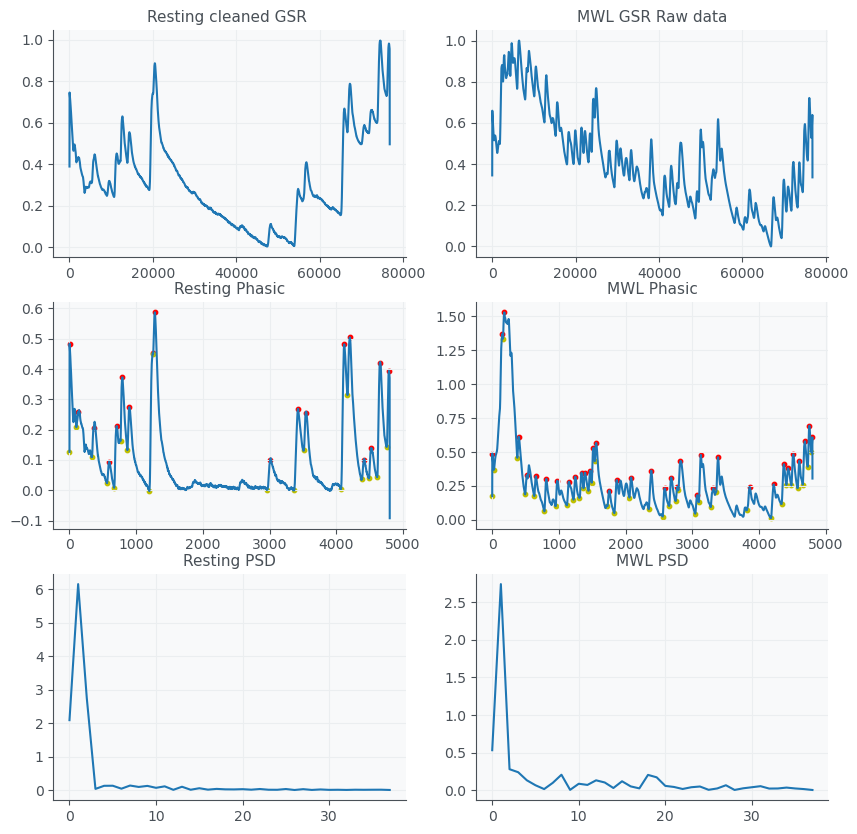

In [158]:
# Sampling freqency for this dataset is 100HZ for pixArt and 256HZ for inf

###############################################################################################################
###############################################################################################################
############################################  005 #############################################################
###############################################################################################################
###############################################################################################################

Fs = 256
print('**************************************************************************')
print('***************************** MWL 005 ************************************')
print('**************************************************************************')
####################################### During resting 5min ###################################################
Resting5 = Get_dataFromExcel( '../../../datasets/Mental_workLoad/MAUS/MAUS/Data/Raw_data/005/inf_resting.csv','Resting_GSR')
# Clean and Extract some time domain features
r_clean_sig5 , r_Phasic5 , r_tonic5 , r_onset5 , r_peaks5 , _ = Ledapy_GSR_ExtractPhasicTonic_Onset_Peaks_risetime( Resting5 , 0.1 , a_plot=False )

plt.figure(figsize=(10, 10))
# Plot cleaned data
plt.subplot( 3 , 2 , 1  )
plt.title('Resting cleaned GSR ')
plt.plot(r_clean_sig5)
# Plot Phasic componants with onsets and peaks
plt.subplot( 3 , 2 , 3 )
plt.title('Resting Phasic')
Plot_Phasic_with_onset_and_peaks( r_Phasic5 , r_onset5 , r_peaks5 )
# plot freqency componants
r_FFT5 , r_PSD5 , _ = Extract_frequency_Features( r_clean_sig5 , a_plot=False )
plt.subplot( 3 , 2 , 5 )
plt.title('Resting PSD')
plt.plot(r_PSD5)
print( f"PSD at resting = {sum(r_PSD5)}")



####################################### During Mental work load Trial1 ###################################################
MWL5  = Get_dataFromExcel( '../../../datasets/Mental_workLoad/MAUS/MAUS/Data/Raw_data/003/inf_gsr.csv', 'Trial 1:0back')
m_clean_sig5 , m_Phasic5 , m_tonic5 , m_onset5 , m_peaks5 , _ = Ledapy_GSR_ExtractPhasicTonic_Onset_Peaks_risetime( MWL5 , 0.1 , a_plot=False )

# Plot cleaned data
plt.subplot( 3 , 2 , 2  )
plt.title('MWL GSR Raw data')
plt.plot(m_clean_sig5)
# Plot Phasic componants with onsets and peaks
plt.subplot( 3 , 2 , 4 )
plt.title('MWL Phasic')
Plot_Phasic_with_onset_and_peaks( m_Phasic5 , m_onset5 , m_peaks5 )
# plot freqency componants
m_FFT5 , m_PSD5 , _ = Extract_frequency_Features( m_clean_sig5 , a_plot=False )
plt.subplot( 3 , 2 , 6 )
plt.title('MWL PSD')
plt.plot(m_PSD5)
print( f"PSD at MWL = {sum(m_PSD5)}")



Stress dataset

**************************************************************************
***************************** MWL 005 ************************************
**************************************************************************
PSD  = 1028.5403488879203


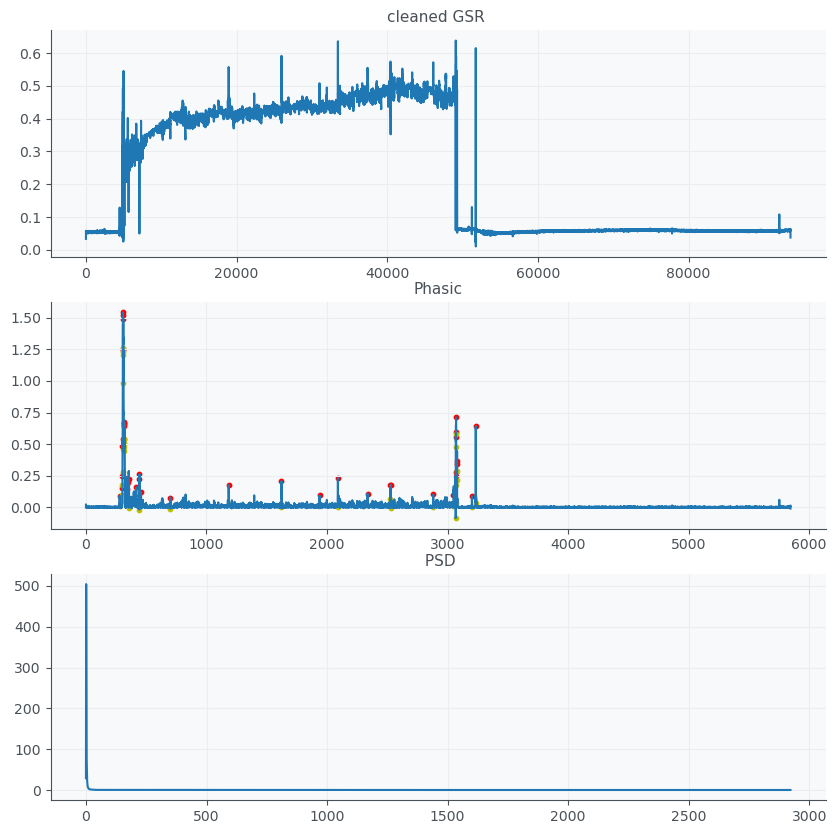

In [207]:
# Sampling freqency for this dataset is 4HZ

###############################################################################################################
###############################################################################################################
############################################ S1   #############################################################
###############################################################################################################
###############################################################################################################


print('**************************************************************************')
print('***************************** stress S1 ************************************')
print('**************************************************************************')


stress1 = Get_dataFromExcel( '../../../datasets/Stress/a-wearable-exam-stress-dataset-for-predicting-cognitive-performance-in-real-world-settings-1.0.0/Data/S1/Final/EDA.csv')
Fs = int(stress1[0]) # Get sampling freqency
stress1 = stress1[60:]

# Clean and Extract some time domain features
s_clean_sig1 , s_Phasic1 , s_tonic1 , s_onset1 , s_peaks1 , _ = Ledapy_GSR_ExtractPhasicTonic_Onset_Peaks_risetime( stress1 , 0.1 , a_plot=False )

plt.figure(figsize=(10, 10))
# Plot cleaned data
plt.subplot( 3 , 1 , 1  )
plt.title('cleaned GSR ')
plt.plot(s_clean_sig1)
# Plot Phasic componants with onsets and peaks
plt.subplot( 3 , 1 , 2 )
plt.title('Phasic')
Plot_Phasic_with_onset_and_peaks( s_Phasic1 , s_onset1 , s_peaks1 )
# plot freqency componants
s_FFT1 , s_PSD1 , _ = Extract_frequency_Features( s_clean_sig1 , a_plot=False )
plt.subplot( 3 , 1 , 3 )
plt.title(' PSD')
plt.plot(s_PSD1)
print( f"PSD  = {sum(s_PSD1)}")


**************************************************************************
***************************** stress S2 ************************************
**************************************************************************
PSD  = 418.6193334475456


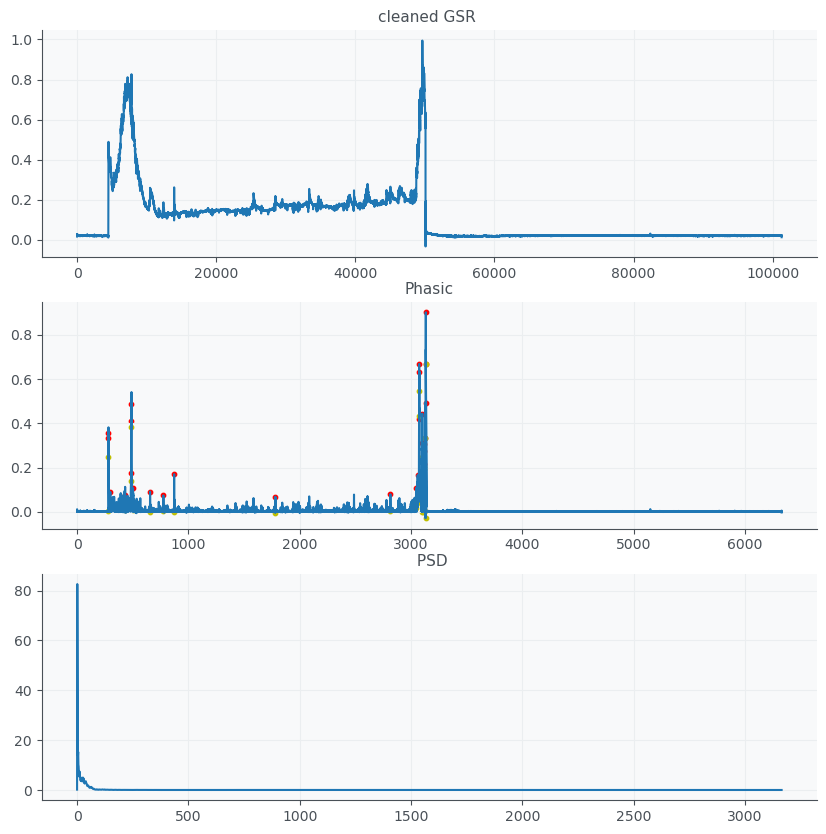

In [208]:
# Sampling freqency for this dataset is 4HZ

###############################################################################################################
###############################################################################################################
############################################ S2  ##############################################################
###############################################################################################################
###############################################################################################################


print('**************************************************************************')
print('***************************** stress S2 ************************************')
print('**************************************************************************')


stress2 = Get_dataFromExcel( '../../../datasets/Stress/a-wearable-exam-stress-dataset-for-predicting-cognitive-performance-in-real-world-settings-1.0.0/Data/S2/Final/EDA.csv')
Fs = int(stress2[0]) # Get sampling freqency
stress2 = stress2[60:]

# Clean and Extract some time domain features
s_clean_sig2 , s_Phasic2 , s_tonic2 , s_onset2 , s_peaks2 , _ = Ledapy_GSR_ExtractPhasicTonic_Onset_Peaks_risetime( stress2 , 0.1 , a_plot=False )

plt.figure(figsize=(10, 10))
# Plot cleaned data
plt.subplot( 3 , 1 , 1  )
plt.title('cleaned GSR ')
plt.plot(s_clean_sig2)
# Plot Phasic componants with onsets and peaks
plt.subplot( 3 , 1 , 2 )
plt.title('Phasic')
Plot_Phasic_with_onset_and_peaks( s_Phasic2 , s_onset2 , s_peaks2 )
# plot freqency componants
s_FFT2 , s_PSD2 , _ = Extract_frequency_Features( s_clean_sig2 , a_plot=False )
plt.subplot( 3 , 1 , 3 )
plt.title(' PSD')
plt.plot(s_PSD2)
print( f"PSD  = {sum(s_PSD2)}")
